![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
df=pd.read_excel("BBDD_Hospitalización.xlsx")
df.head()


c:\Users\Musi\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.7,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.0,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0


In [7]:
df.describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,564.000000,568.000000,568.000000,568.000000
mean,63.882042,13.271401,12.996479,0.165493,0.014085
std,9.281517,15.668966,3.921180,0.958066,0.196474
min,39.000000,0.600000,4.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,12.000000,3.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, 0 to 567
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EDAD                               559 non-null    float64
 1   DIABETES                           559 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES         559 non-null    object 
 3   PSA                                555 non-null    float64
 4   VOLUMEN PROSTATICO                 558 non-null    object 
 5   ENF. CRONICA PULMONAR OBSTRUCTIVA  557 non-null    object 
 6   BIOPSIA                            559 non-null    object 
 7   DIAS POST BIOP c/ COMPLICACION     0 non-null      object 
 8   FIEBRE                             559 non-null    object 
 9   ITU                                559 non-null    object 
 10  TIPO DE CULTIVO                    559 non-null    object 
 11  AGENTE AISLADO                     542 non-null    object 
 12 

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [8]:
df.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC'],
      dtype='object')

In [4]:

df.columns
# variable irrelevante antibiotico usado en profilaxis
df[df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS']=='FLUOROQUINOLONA_AMINOGLICOSIDO'].count()
del df['ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS']
del df['NUMERO DE MUESTRAS TOMADAS']


In [5]:
del df['CUP']

In [6]:
# elimino edad mayor a 100 
df[df['EDAD']>100]
df[df['PSA']>10]
df[df['EDAD']>100]


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
161,143.0,SI,NO,6.8,NO,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
181,151.0,NO,NO,5.7,NO,SI,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [7]:
# elimino edad mayor a 100 

df.drop(df.index[161], inplace=True)
df.drop(df.index[181], inplace=True)
df[df['EDAD']>100]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
181,151.0,NO,NO,5.7,NO,SI,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [8]:
# Índice de la fila que deseas eliminar
indice_a_eliminar = 181

# Elimina la fila
df = df.drop(indice_a_eliminar)

In [9]:
df[df['EDAD']>100]

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC


In [ ]:
nulos=df[df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] == None]
nulos

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,VOLUMEN PROSTATICO,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC


In [ ]:
nulos=df[df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].isna()]
nulos
df= df.dropna(how='all')
df

In [ ]:
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace('NO', '0')

df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].astype(int)


In [ ]:
nulos=df[df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA']== None]
nulos

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,VOLUMEN PROSTATICO,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC


In [17]:
#Remuevo registros duplicados no habian
df_new= df.drop_duplicates()

DF.COLUMns

In [11]:
# renombro columna con nombre muy largo
type(df)
df2=df
df.rename(columns={'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'DIAS POST BIOP c/ COMPLICACION'}, inplace=True)
df.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'DIAS POST BIOP c/ COMPLICACION', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO',
       'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION',
       'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC'],
      dtype='object')

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

El pairplot, le cambio el nombre a la variable de complicacion post biopsia porque es muy larga y no me permite ver el pairplot
borro registros con todos nulos,
para graficar el psa paso donde dice NO a cero y convierto a entero

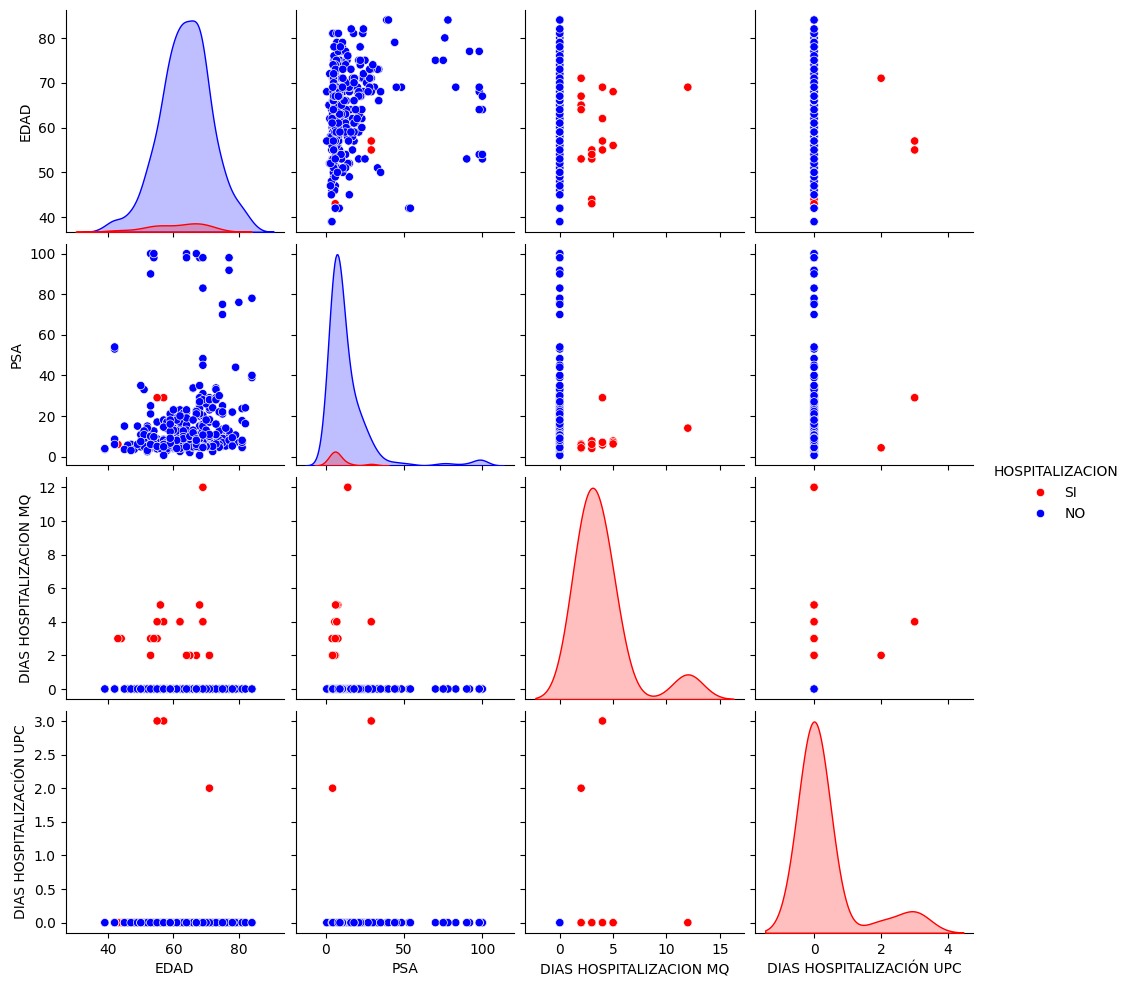

In [21]:
import seaborn as sns
sns.pairplot(df, hue="HOSPITALIZACION", palette = ['r', 'b'])
plt.show()

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [ ]:
# ya se eliminaron las edades mayores a 100
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 567
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EDAD                               564 non-null    float64
 1   DIABETES                           564 non-null    int32  
 2   HOSPITALIZACIÓN ULTIMO MES         564 non-null    int32  
 3   PSA                                560 non-null    float64
 4   VOLUMEN PROSTATICO                 564 non-null    object 
 5   ENF. CRONICA PULMONAR OBSTRUCTIVA  564 non-null    object 
 6   BIOPSIA                            564 non-null    object 
 7   DIAS POST BIOP c/ COMPLICACION     564 non-null    int32  
 8   FIEBRE                             564 non-null    int32  
 9   ITU                                564 non-null    int32  
 10  TIPO DE CULTIVO                    564 non-null    object 
 11  AGENTE AISLADO                     547 non-null    object 
 12 

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

In [12]:
df.head(1)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,DIAS POST BIOP c/ COMPLICACION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.0,NO,SI,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0


C:\Users\Musi\AppData\Local\Temp\ipykernel_21336\3550302342.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat, palette="Set1")


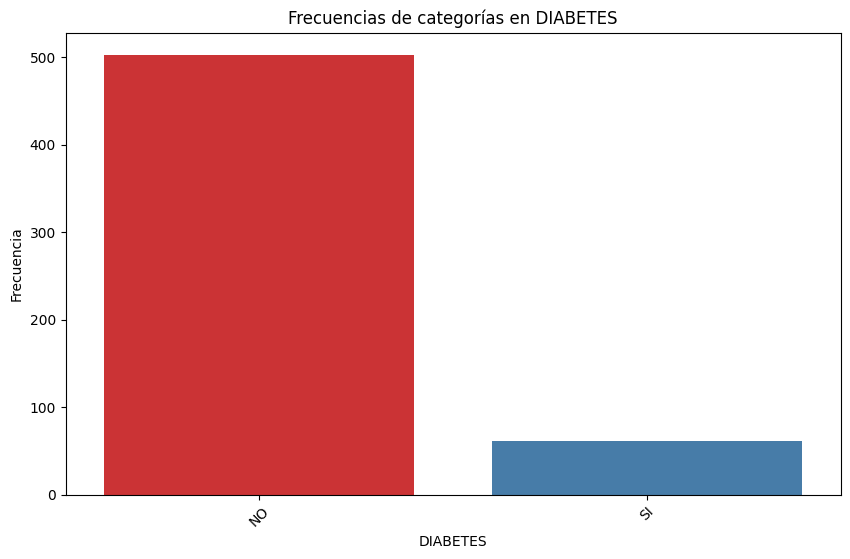

C:\Users\Musi\AppData\Local\Temp\ipykernel_21336\3550302342.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat, palette="Set1")


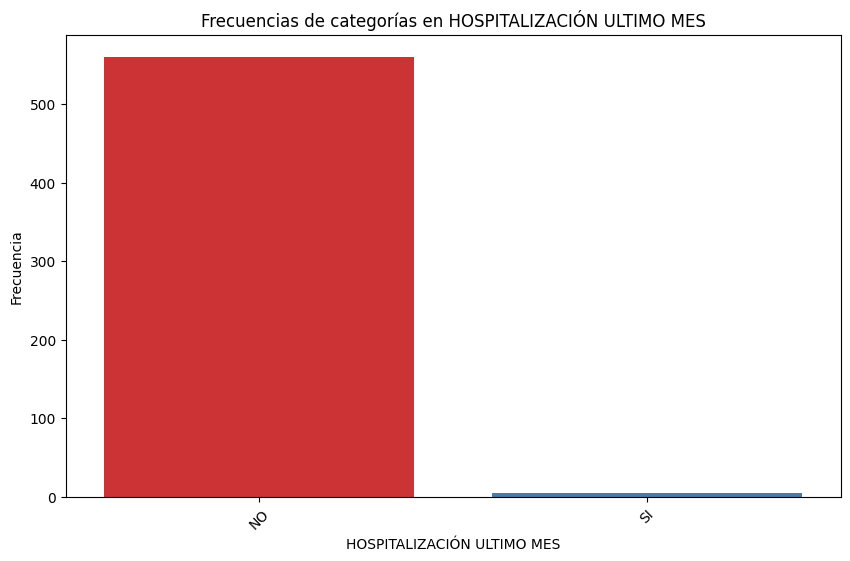

C:\Users\Musi\AppData\Local\Temp\ipykernel_21336\3550302342.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat, palette="Set1")


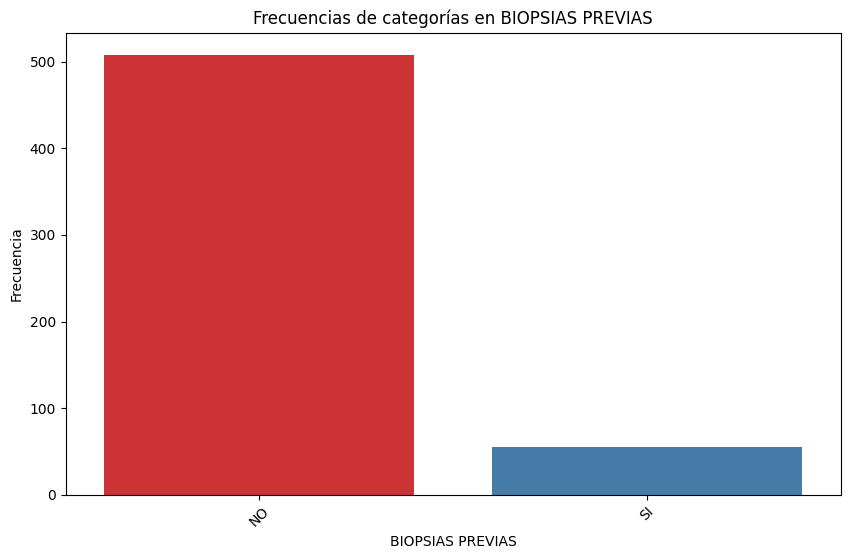

C:\Users\Musi\AppData\Local\Temp\ipykernel_21336\3550302342.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat, palette="Set1")


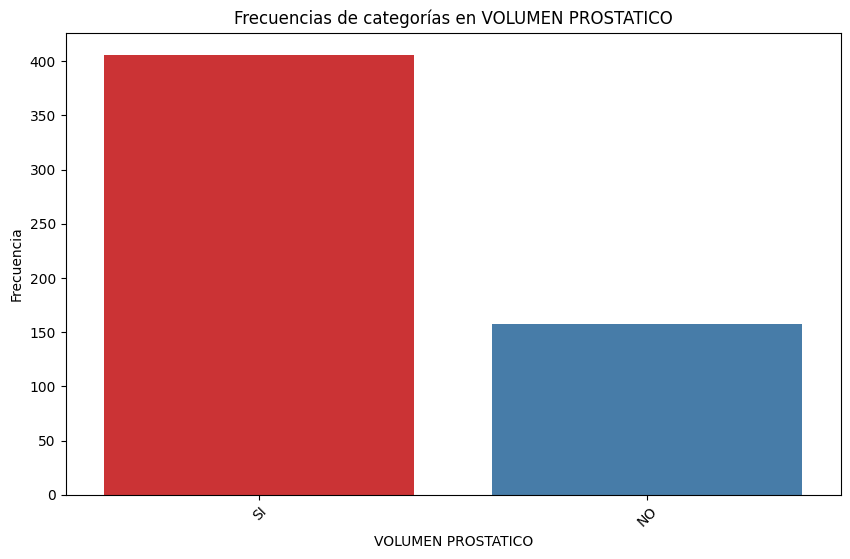

C:\Users\Musi\AppData\Local\Temp\ipykernel_21336\3550302342.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat, palette="Set1")


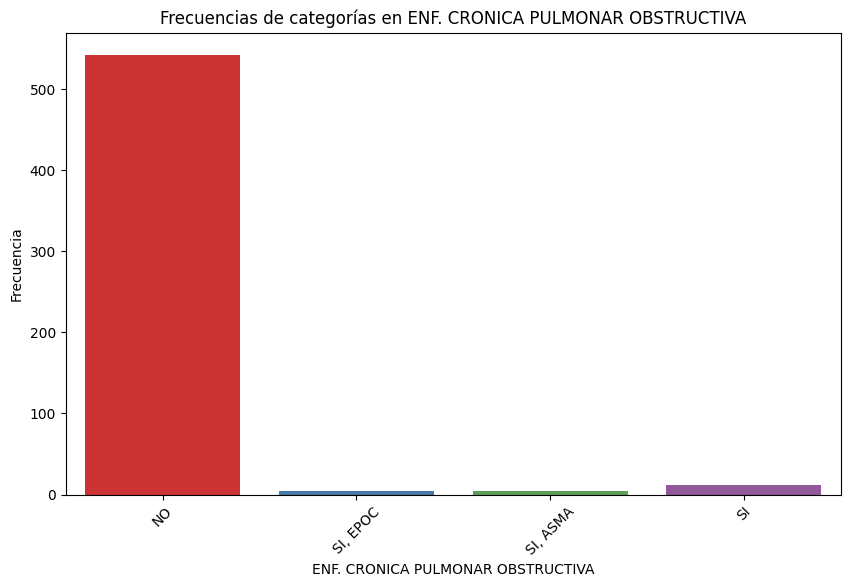

C:\Users\Musi\AppData\Local\Temp\ipykernel_21336\3550302342.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat, palette="Set1")


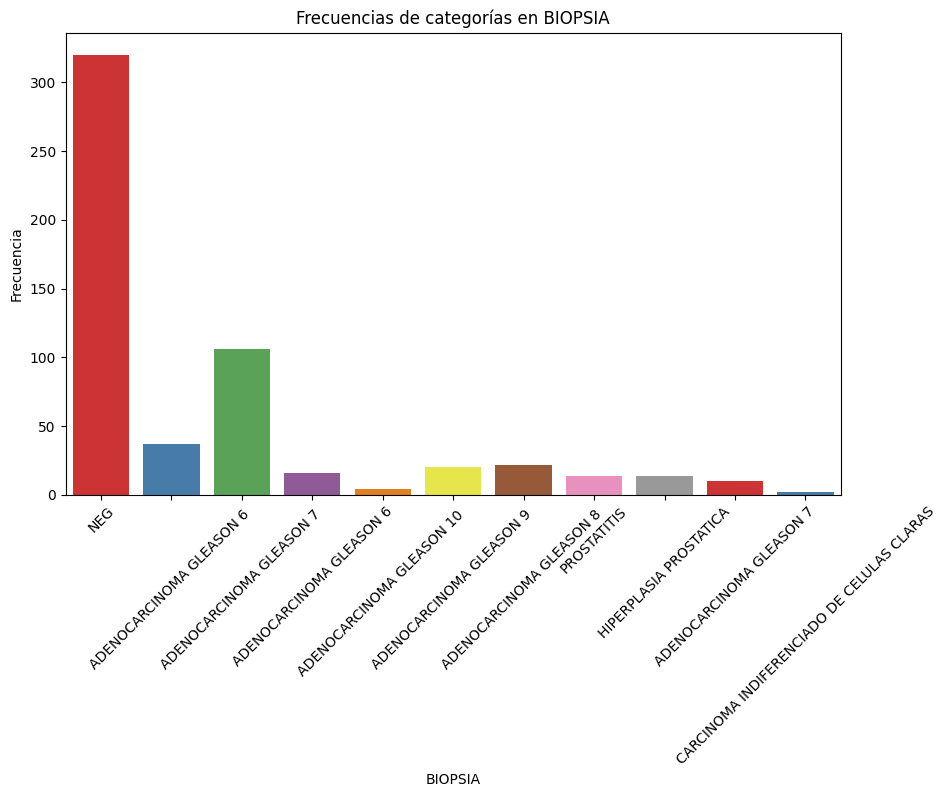

C:\Users\Musi\AppData\Local\Temp\ipykernel_21336\3550302342.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat, palette="Set1")


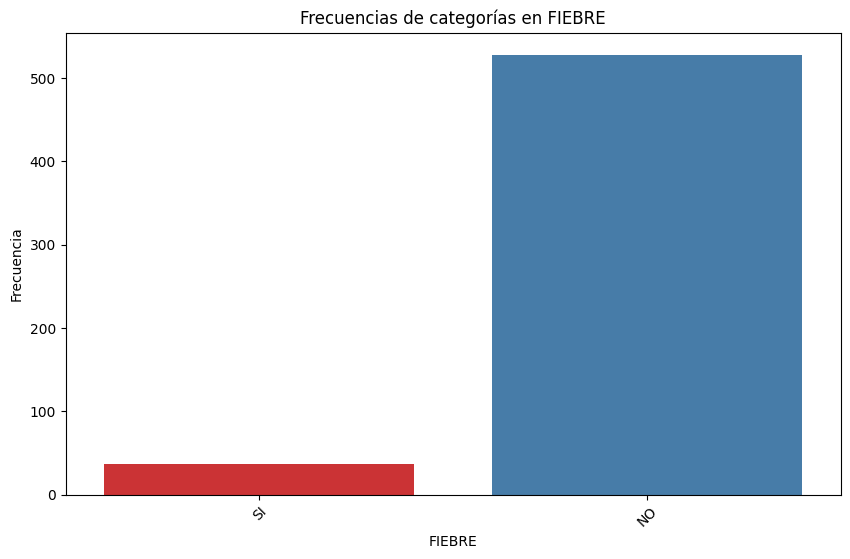

C:\Users\Musi\AppData\Local\Temp\ipykernel_21336\3550302342.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat, palette="Set1")


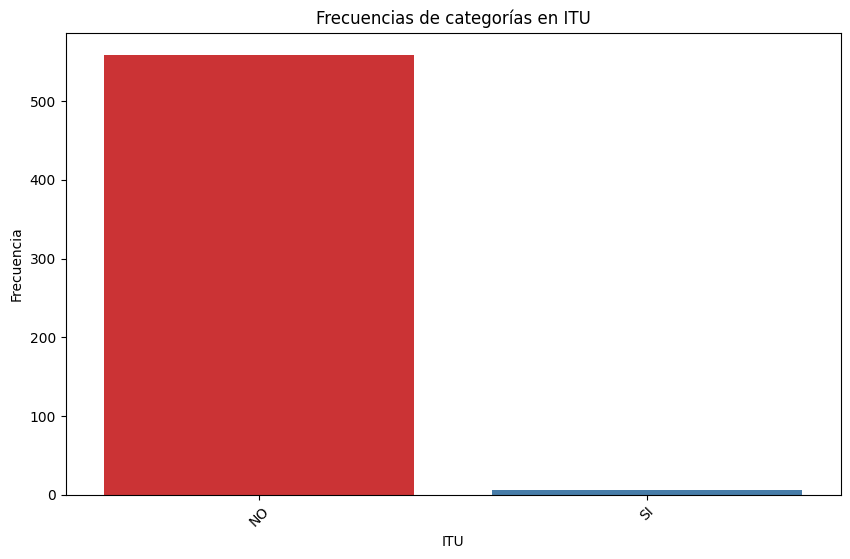

C:\Users\Musi\AppData\Local\Temp\ipykernel_21336\3550302342.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat, palette="Set1")


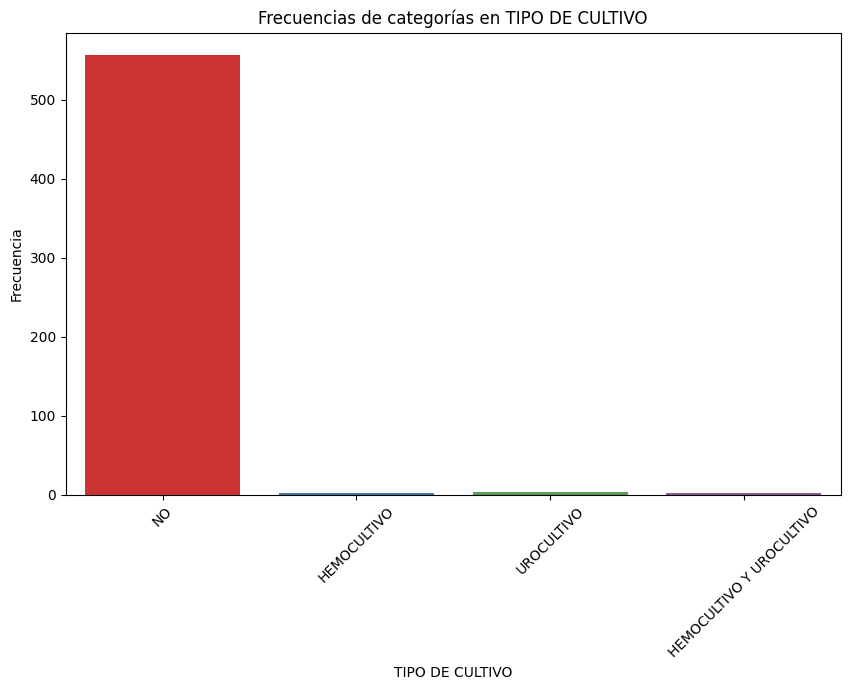

C:\Users\Musi\AppData\Local\Temp\ipykernel_21336\3550302342.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat, palette="Set1")


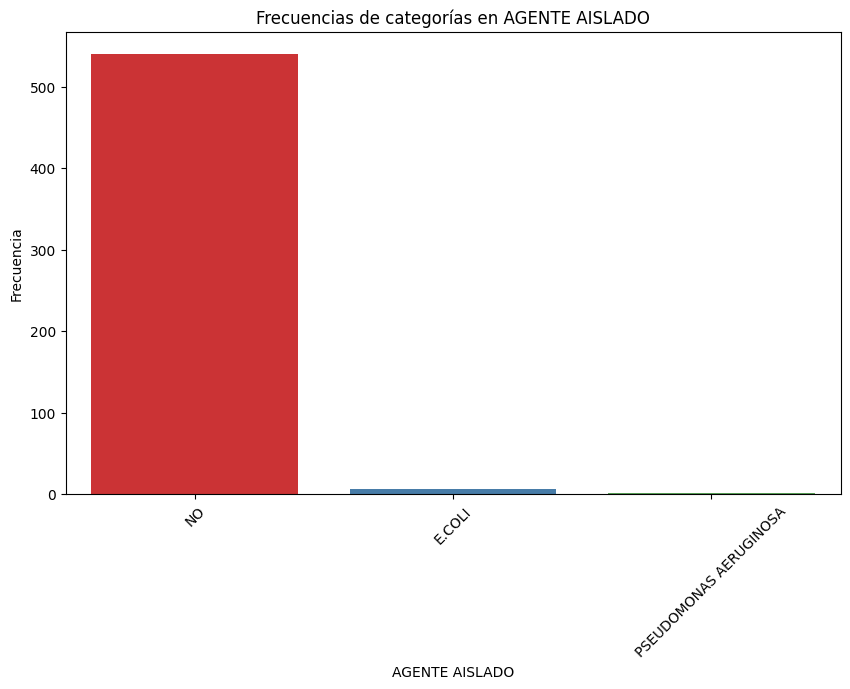

C:\Users\Musi\AppData\Local\Temp\ipykernel_21336\3550302342.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=cat, palette="Set1")


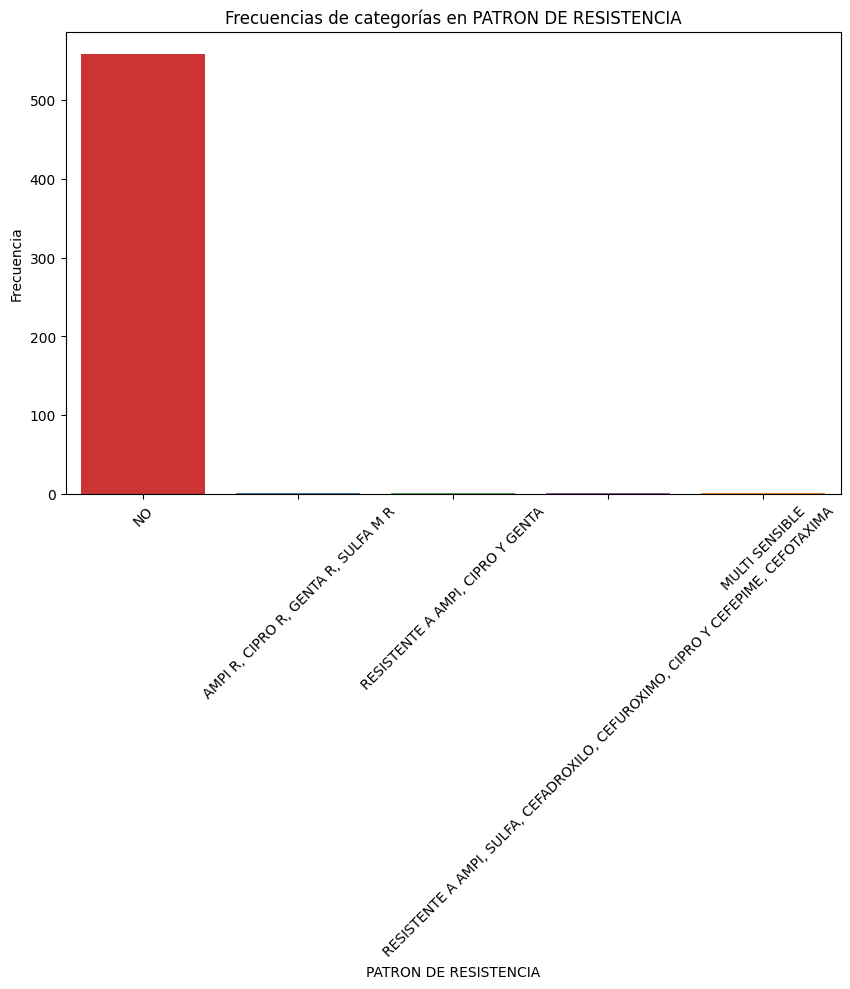

In [28]:
CATEGORICAS=['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO',
       'AGENTE AISLADO', 'PATRON DE RESISTENCIA']
for cat in CATEGORICAS:
# Visualización de la variable categórica "variable_1"
       plt.figure(figsize=(10, 6))
       sns.countplot(data=df, x=cat, palette="Set1")
       plt.title("Frecuencias de categorías en "+cat)
       plt.xlabel(cat)
       plt.ylabel("Frecuencia")
       plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario
       plt.show()




Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [17]:
df

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,DIAS POST BIOP c/ COMPLICACION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,67.0,NO,NO,6.00,NO,SI,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
564,64.0,NO,NO,4.80,NO,SI,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NaN,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0


In [59]:
# Para verificar la cantidad de valores nulos en cada columna:
null_counts = df.isnull().sum()

# Para ver un resumen de los valores nulos por columna:
print(null_counts)


EDAD                                 0
DIABETES                             0
HOSPITALIZACIÓN ULTIMO MES           0
PSA                                  0
BIOPSIAS PREVIAS                     0
VOLUMEN PROSTATICO                   0
ENF. CRONICA PULMONAR OBSTRUCTIVA    0
BIOPSIA                              0
DIAS POST BIOP c/ COMPLICACION       0
FIEBRE                               0
ITU                                  0
TIPO DE CULTIVO                      0
AGENTE AISLADO                       0
PATRON DE RESISTENCIA                0
HOSPITALIZACION                      0
DIAS HOSPITALIZACION MQ              0
DIAS HOSPITALIZACIÓN UPC             0
dtype: int64


In [24]:
nulos = df[df.isnull().any(axis=1)]
nulos

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,DIAS POST BIOP c/ COMPLICACION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
9,44.0,NO,NO,NaN,NO,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0
31,63.0,NO,NO,10.80,NO,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
76,57.0,NO,NO,NaN,NO,NO,NO,HIPERPLASIA PROSTATICA,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
92,58.0,NO,NO,7.80,NaN,SI,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
100,74.0,NO,NO,5.80,NO,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
103,60.0,NO,NO,NaN,SI,SI,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
109,61.0,NO,NO,7.00,NO,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
121,62.0,NO,NO,NaN,NO,SI,NO,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NaN,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [18]:
df['AGENTE AISLADO'] = df['AGENTE AISLADO'].fillna('NO')

In [14]:
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'] = df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].fillna('NO')


In [26]:
# a los q no tienen psa les pongo la media
df['PSA'] = df['PSA'].fillna(df['PSA'].mean())


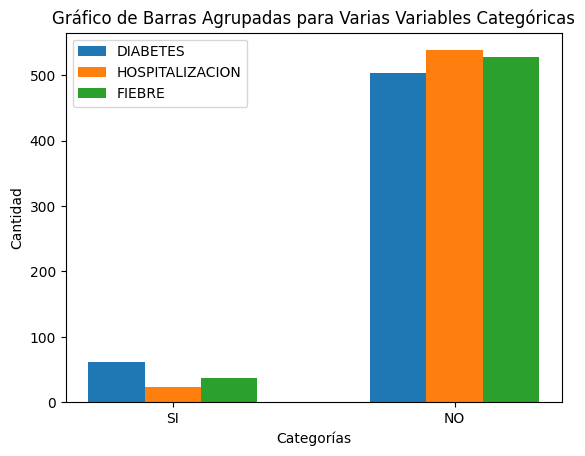

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ejemplo de datos
categorias = ['SI', 'NO']  # Categorías
variable1 = [len(df[df['DIABETES'] == 'SI']), len(df[df['DIABETES'] == 'NO'])]
variable2 = [len(df[df['HOSPITALIZACION'] == 'SI']), len(df[df['HOSPITALIZACION'] == 'NO'])]
variable3 = [len(df[df['FIEBRE'] == 'SI']), len(df[df['FIEBRE'] == 'NO'])]

# Ancho de las barras
bar_width = 0.2

# Coordenadas en el eje x para las categorías
x = np.arange(len(categorias))

# Crear las barras para las tres variables
plt.bar(x - bar_width, variable1, bar_width, label='DIABETES')
plt.bar(x, variable2, bar_width, label='HOSPITALIZACION')
plt.bar(x + bar_width, variable3, bar_width, label='FIEBRE')

# Etiquetas en el eje x y leyenda
plt.xlabel('Categorías')
plt.ylabel('Cantidad')
plt.xticks(x, categorias)
plt.legend()

# Título
plt.title('Gráfico de Barras Agrupadas para Varias Variables Categóricas')

# Mostrar el gráfico
plt.show()


Para el caso de las variables numéricas, ¿Es necesario normalizar? NO

In [28]:
df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].isna()
df.tail()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,DIAS POST BIOP c/ COMPLICACION,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
563,67.0,NO,NO,6.00,NO,SI,NO,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
564,64.0,NO,NO,4.80,NO,SI,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
565,69.0,NO,NO,4.43,NaN,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [29]:
df['ENF. CRONICA PULMONAR OBSTRUCTIVA']=df['ENF. CRONICA PULMONAR OBSTRUCTIVA'].fillna("NO")

In [ ]:
df['DIAS POST BIOP c/ COMPLICACION']=df['DIAS POST BIOP c/ COMPLICACION'].replace("NO",0)
df['DIAS POST BIOP c/ COMPLICACION']

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [39]:
df.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'DIAS POST BIOP c/ COMPLICACION', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO',
       'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION',
       'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC'],
      dtype='object')

In [52]:
categorias=['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'DIAS POST BIOP c/ COMPLICACION', 'FIEBRE', 'ITU', 'TIPO DE CULTIVO',
       'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION',
       'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC']

hospital=df
from sklearn.preprocessing import LabelEncoder

# Paso todas las variables a numericas


le = LabelEncoder()
for cat in categorias:
    # Ajusta el LabelEncoder a los datos y transforma la columna
    hospital[cat] = le.fit_transform(hospital[cat])

In [68]:
(df['HOSPITALIZACION'] > 1).sum()
df['HOSPITALIZACION']=df['HOSPITALIZACION'].replace(2, 0)

In [71]:
(df['HOSPITALIZACION'] == 1).sum()

24

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

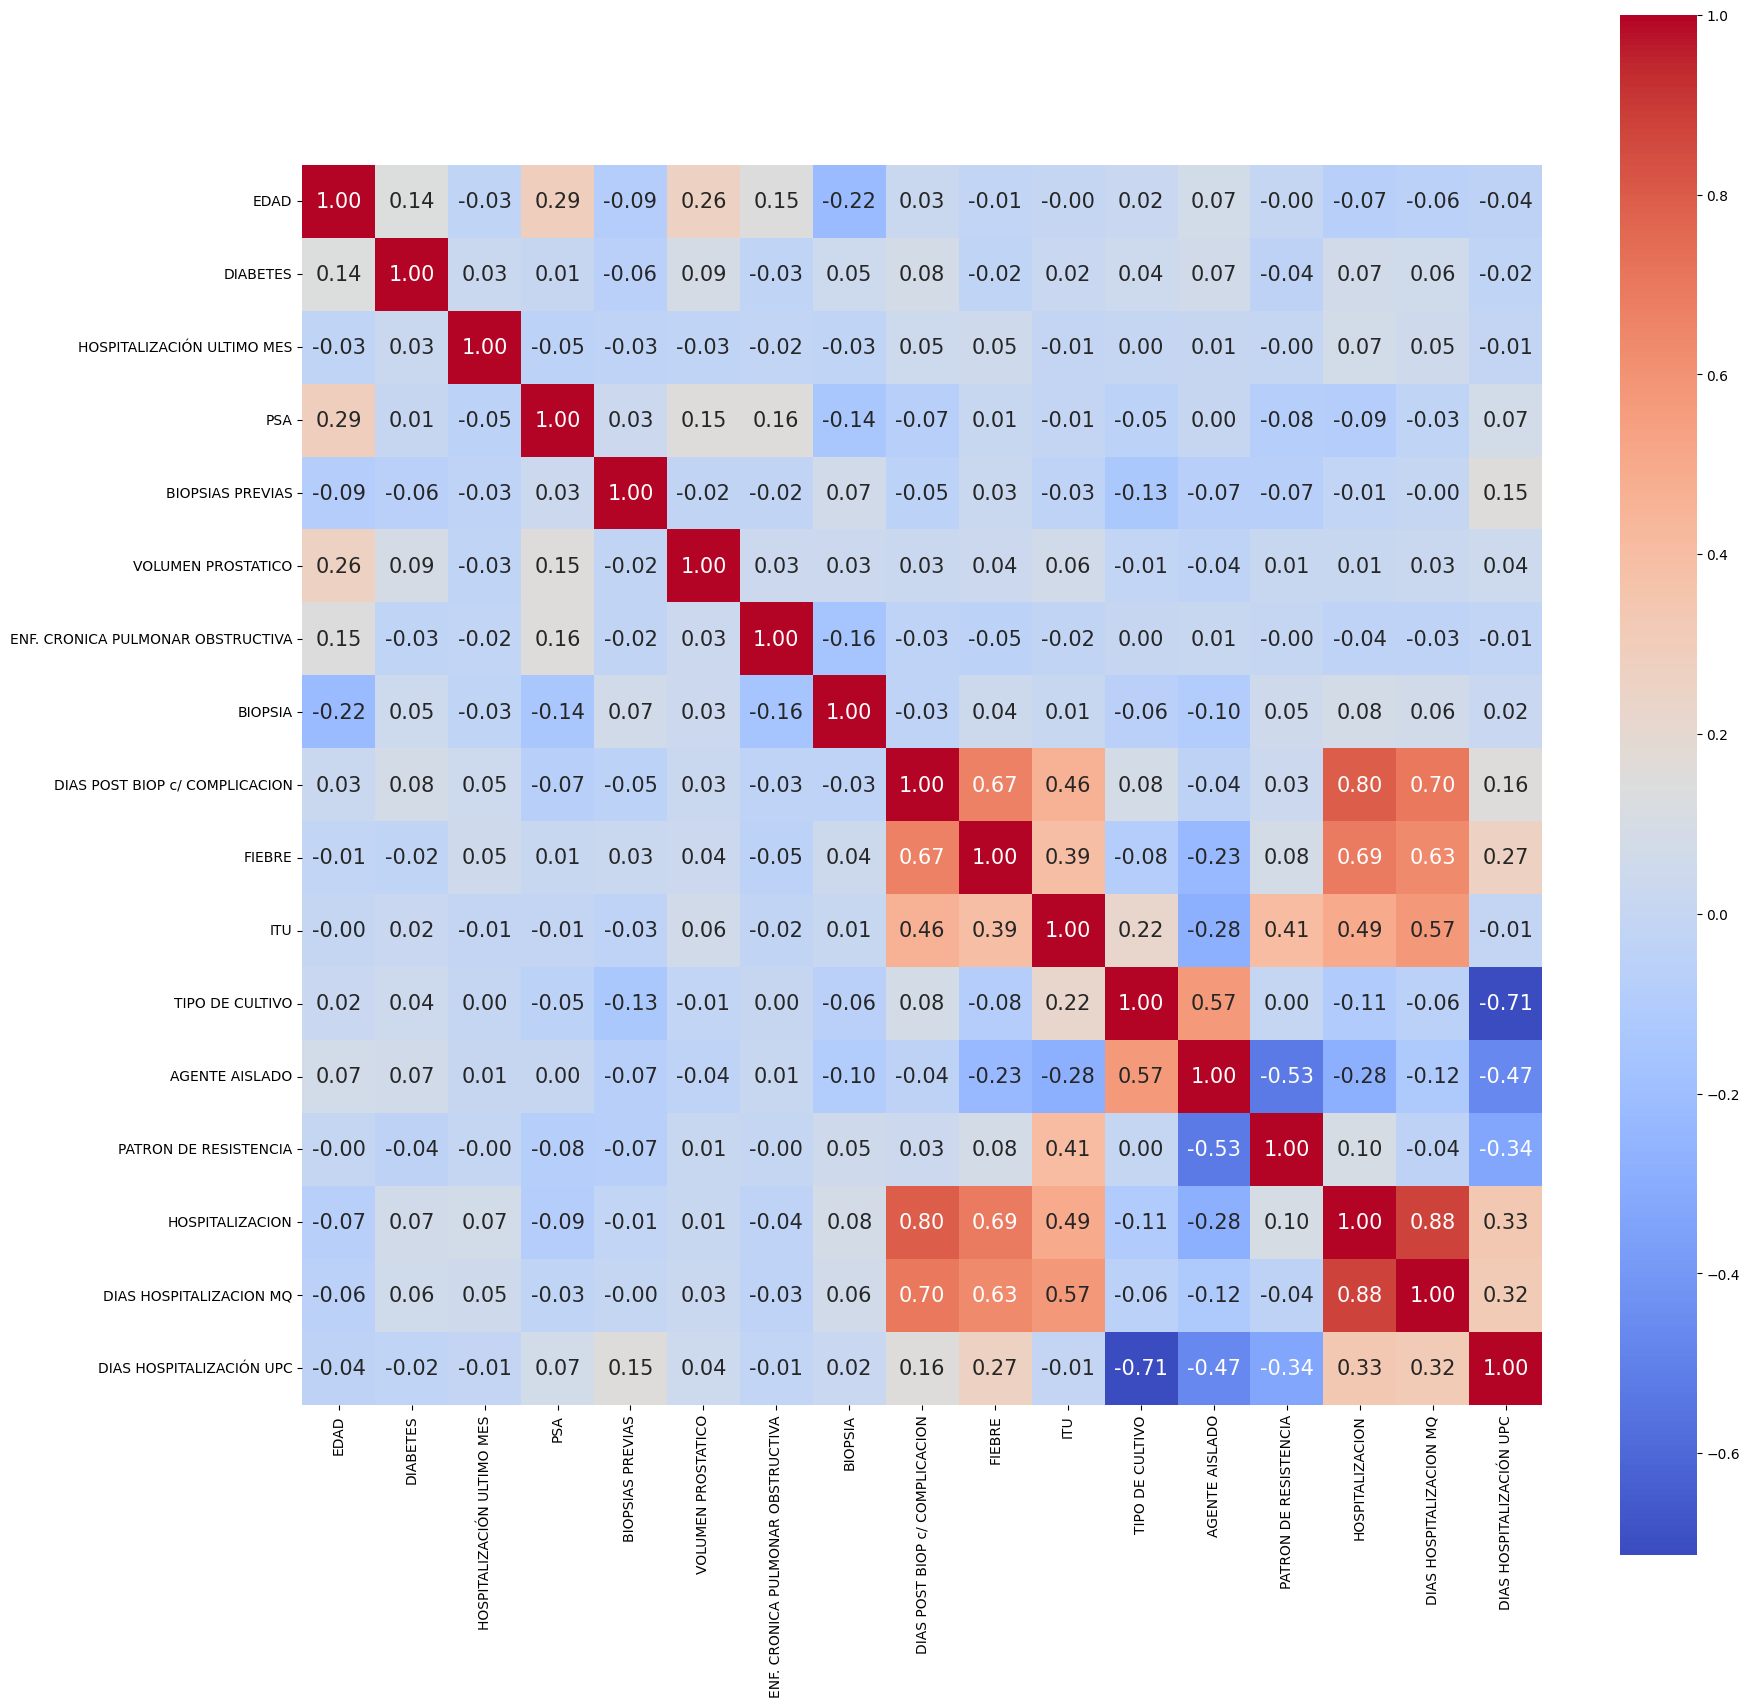

In [72]:


matriz_correlacion = hospital.corr()
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(matriz_correlacion, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df.columns,
           yticklabels= df.columns,
           cmap= 'coolwarm')

# Crear un mapa de calor de la matriz de correlación

# Mostrar el mapa de calor
plt.show()

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [73]:
# Especifica la ubicación y el nombre del archivo CSV que deseas crear
nombre_archivo = 'PacientesHosp.csv'

# Guarda el DataFrame como un archivo CSV
hospital.to_csv(nombre_archivo, index=False)  # El parámetro index=False evita guardar el índice en el archivo
